In [18]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
files = np.loadtxt('foi.csv', dtype='str', delimiter = ',')

In [3]:
thetas = np.zeros(files.size)
phis = np.zeros(files.size)
shellnums = np.zeros(files.size)

for idx, file in enumerate(files):
    currdata = np.loadtxt('./data/'+file, delimiter = ',')
    
    shellnums[idx] = currdata[0, -3]
    thetas[idx] = currdata[0, -2]
    phis[idx] = currdata[0, -1]

In [4]:
print('Min theta: '+str(thetas.min())+' rad')
print('Max theta: '+str(thetas.max())+' rad')

Min theta: 0.014142253477512098 rad
Max theta: 3.127450400112281 rad


In [5]:
print('Min phi: '+str(phis.min())+' rad')
print('Max phi: '+str(phis.max())+' rad')

Min phi: 0.0 rad
Max phi: 6.282769944890816 rad


Text(0.5, 1.0, 'Thetas')

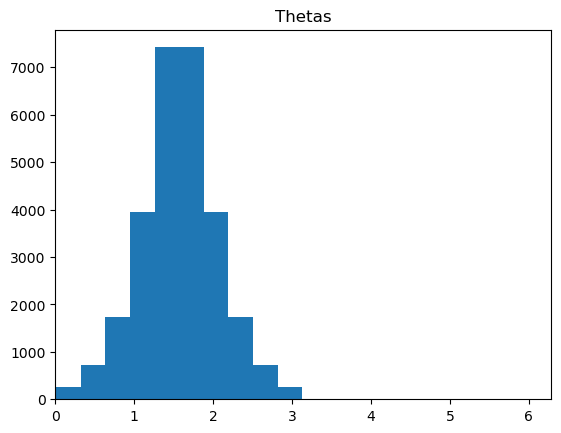

In [12]:
plt.hist(thetas)
plt.xlim(0,2*np.pi)
plt.title('Thetas')

Text(0.5, 1.0, 'Phis')

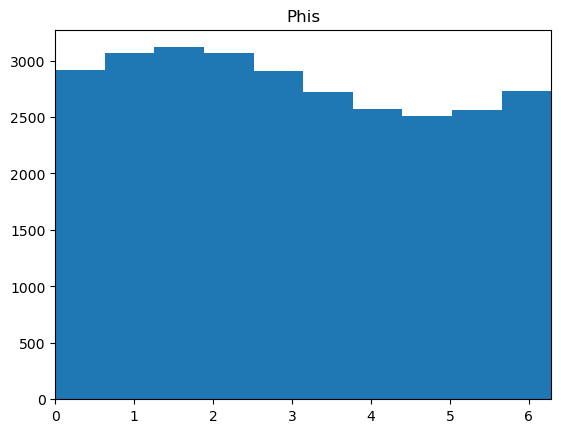

In [7]:
plt.hist(phis)
plt.xlim(0,2*np.pi)
plt.title('Phis')

In [26]:
def staticdistribution(foi_list = 'foi.csv'):
    
    files = np.loadtxt('foi.csv', dtype='str', delimiter = ',')
    
    thetas_flat = np.zeros(files.size)
    phis_flat = np.zeros(files.size)
    shellnums_flat = np.zeros(files.size)
    
    for idx in tqdm(range(files.size)):
        currdata = np.loadtxt('./data/'+files[idx], delimiter = ',')
        
        shellnums_flat[idx] = currdata[0, -3]
        thetas_flat[idx] = currdata[0, -2]
        phis_flat[idx] = currdata[0, -1]
        
    return(shellnums_flat, thetas_flat, phis_flat)

In [27]:
shellnums_flat, thetas_flat, phis_flat = staticdistribution()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28174/28174 [01:24<00:00, 332.94it/s]


In [52]:
num_shells = np.unique(shellnums_flat).size
print(num_shells)
print(thetas_flat.size)

thetas = np.zeros([num_shells, thetas_flat.size])
phis = np.zeros([num_shells, phis_flat.size])

shellnums = np.ones_like(thetas, dtype = int)

for idx in np.unique(shellnums_flat):
    idx = int(idx)
    thetas[idx, 0:np.count_nonzero(shellnums_flat == idx)] = thetas_flat[shellnums_flat == idx]
    phis[idx, 0:np.count_nonzero(shellnums_flat == idx)] = phis_flat[shellnums_flat == idx]
    
    shellnums[idx] = shellnums[idx]*idx

thetas[thetas == 0.] = np.nan
phis[phis == 0.] = np.nan
print(np.count_nonzero(thetas[0]))

5
28174
28174


In [74]:
np.unique(shellnums)

array([0, 1, 2, 3, 4])

In [73]:
colors = np.array(['orange', 'green', 'red', 'purple', 'blue'])

if len(colors)==0:
    print('ugh')